In [1]:
from tqdm.notebook import trange, tqdm
import pickle as pkl
import numpy as np
from sage.symbolic.expression_conversions import PolynomialConverter

In [2]:
def mycollect(e1, e2):
    """
    Collects e2 coefficients in e1, even when e2 is not a factor of
    some of the terms of e1
    """
    g = maxima_calculus.gensym()._sage_()
    while g in e1.variables(): g = maxima_calculus.gensym()._sage_()
    return sum([v[0]*g^v[1]
                for v in e1.subs(e2==g).coefficients(g)]).subs(g==e2)

In [3]:
var_list=["a"+str(i) for i in range(0,100)]+["x"+str(i) for i in range(0,100)]+["s1","s2"]+["e"+str(i) for i in range(0,1000)]

In [57]:
var(var_list+["n0","s","t","n","q","x","a","b","c","d","u"])

(a0,
 a1,
 a2,
 a3,
 a4,
 a5,
 a6,
 a7,
 a8,
 a9,
 a10,
 a11,
 a12,
 a13,
 a14,
 a15,
 a16,
 a17,
 a18,
 a19,
 a20,
 a21,
 a22,
 a23,
 a24,
 a25,
 a26,
 a27,
 a28,
 a29,
 a30,
 a31,
 a32,
 a33,
 a34,
 a35,
 a36,
 a37,
 a38,
 a39,
 a40,
 a41,
 a42,
 a43,
 a44,
 a45,
 a46,
 a47,
 a48,
 a49,
 a50,
 a51,
 a52,
 a53,
 a54,
 a55,
 a56,
 a57,
 a58,
 a59,
 a60,
 a61,
 a62,
 a63,
 a64,
 a65,
 a66,
 a67,
 a68,
 a69,
 a70,
 a71,
 a72,
 a73,
 a74,
 a75,
 a76,
 a77,
 a78,
 a79,
 a80,
 a81,
 a82,
 a83,
 a84,
 a85,
 a86,
 a87,
 a88,
 a89,
 a90,
 a91,
 a92,
 a93,
 a94,
 a95,
 a96,
 a97,
 a98,
 a99,
 x0,
 x1,
 x2,
 x3,
 x4,
 x5,
 x6,
 x7,
 x8,
 x9,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x40,
 x41,
 x42,
 x43,
 x44,
 x45,
 x46,
 x47,
 x48,
 x49,
 x50,
 x51,
 x52,
 x53,
 x54,
 x55,
 x56,
 x57,
 x58,
 x59,
 x60,
 x61,
 x62,
 x63,
 x64,
 x65,
 x66,
 x67,
 x68,
 x69,


In [58]:
e = SymmetricFunctions(QQ).e()

In [59]:
def ele_dict(deg):
        es=[e[i].expand(deg)*(-1)**i for i in range(1,deg+1)]
        coe=list(reversed([eval("a"+str(i)) for i in range(0,deg)]))
        return dict(zip(coe,es))

In [60]:
def poly(n):
    return sum([x0^(j)*eval("a"+str(j)) for j in [0..n-1]])+x0^n

In [61]:
def ordi(exp,vari):
    terms=exp.operands()
    lonely_terms=[i for i in terms if not(i.has(vari))]
    fixed=[i for i in terms if i not in lonely_terms]+[sum(lonely_terms)]
    return fixed

In [62]:
def red(op,deg):
    po=poly(deg).operands()
    po[0:2]=list(reversed(po[0:2]))
    if deg>=4:
        for i in range(0,deg-3):
            leading=op[i].subs({x0:1})
            new=[leading*j*(x0^(deg-4-i)) for j in po]
            if -(deg-4-i)<0:
                op=[(x-y).full_simplify().factor() for x,y in zip(op[0:-(deg-4-i)],new)]+op[len(op)-(deg-4-i):len(op)]
            else:
                op=[(x-y).full_simplify().factor() for x,y in zip(op,new)]
            op=op[1:]
        return op
    else:
        return op
        

In [63]:
def red2(op,deg):
    po=poly(deg)
    if deg>=4:
        for i in range(0,deg-3):
            leading=op.operands()[0].subs({x0:1})
            op=op-leading*(x0^(deg-4-i))*po
            op=mycollect(op.full_simplify(),x0)
        return op
    else:
        return op

In [64]:
def asum(n,roo):
    return sum([(n-j-1)*(n-j)/2*eval("x"+str(roo))^(n-j-2)*eval("a"+str(n-j)) for j in [1..n-2]])+n*(n-1)/2*eval("x"+str(roo))^(n-2)
def bsum(n,roo):
    return sum([j*(n-j)*eval("x"+str(roo))^(n-j-1)*eval("a"+str(n-j)) for j in [1..n-1]])
def csum(n,roo):
    return sum([(j-1)*(j)/2*eval("x"+str(roo))^(n-j)*eval("a"+str(n-j)) for j in [2..n]])

In [65]:
for j in range(2,5):
    print(j)
    print(bsum(j,0),asum(j,0),csum(j,0))
    formula=bsum(j,0)**2-4*asum(j,0)*csum(j,0)
    formula2=(mycollect(formula.subs({x0:x}),x)/(j-1)^2).full_simplify()
    che=formula.subs(ele_dict(j)).full_simplify().factor()
    #p1 = PolynomialConverter(formula2, base_ring=R)
    #print(p1())
    print(mycollect(formula/(j-1)^2,x0))
    print(che)

2
a1 1 a0
a1^2 - 4*a0
(x0 - x1)^2
3
2*a2*x0 + 2*a1 a2 + 3*x0 a1*x0 + 3*a0
(a2^2 - 3*a1)*x0^2 + a1^2 - 3*a0*a2 + (a1*a2 - 9*a0)*x0
4*(x0 - x1)^2*(x0 - x2)^2
4
3*a3*x0^2 + 4*a2*x0 + 3*a1 3*a3*x0 + 6*x0^2 + a2 a2*x0^2 + 3*a1*x0 + 6*a0
1/3*(3*a3^2 - 8*a2)*x0^4 + 4/3*(a2*a3 - 6*a1)*x0^3 + 2/3*(2*a2^2 - 3*a1*a3 - 24*a0)*x0^2 + a1^2 - 8/3*a0*a2 + 4/3*(a1*a2 - 6*a0*a3)*x0
9*(x0 - x1)^2*(x0 - x2)^2*(x0 - x3)^2


In [66]:
mix1=bsum(j,0).subs(ele_dict(j))

In [67]:
mix2=asum(j,0).subs(ele_dict(j))

In [68]:
mix3=csum(j,0).subs(ele_dict(j))

In [69]:
mix1.full_simplify().factor().subs({x0:3})

-3*x1*x2*x3 + 3*x1*x2 + 3*x1*x3 + 3*x2*x3 + 9*x1 + 9*x2 + 9*x3 - 81

In [70]:
bsum(4,0).subs(ele_dict(4)).subs({x0:3,x1:3*x1,x2:3*x2})

-27*x1*x2*x3 + 27*x1*x2 + 9*x1*x3 + 9*x2*x3 + 27*x1 + 27*x2 + 9*x3 - 81

In [71]:
f=(a2^2 - 3*a1)
g=(a1*a2 - 9*a0)
h=(a1^2 - 3*a0*a2)

In [72]:
3*a3*x0^2 + 4*a2*x0 + 3*a1 3*a3*x0 + 6*x0^2 + a2 a2*x0^2 + 3*a1*x0 + 6*a0

SyntaxError: invalid syntax (84219436.py, line 1)

In [73]:
fsub=f.subs(ele_dict(3))
print(fsub)
gsub=g.subs(ele_dict(3))
print(gsub)
hsub=h.subs(ele_dict(3))
print(hsub)

(x0 + x1 + x2)^2 - 3*x0*x1 - 3*x0*x2 - 3*x1*x2
9*x0*x1*x2 - (x0*x1 + x0*x2 + x1*x2)*(x0 + x1 + x2)
-3*(x0 + x1 + x2)*x0*x1*x2 + (x0*x1 + x0*x2 + x1*x2)^2


In [74]:
action=(a*t+b)/(c*t+d)

In [75]:
action_dict={x0:t,x1:action, x2: action.subs({t:action}).full_simplify()}

In [76]:
action_dict

{x0: t,
 x1: (a*t + b)/(c*t + d),
 x2: (a*b + b*d + (a^2 + b*c)*t)/(b*c + d^2 + (a*c + c*d)*t)}

In [77]:
fact=fsub.subs(action_dict).full_simplify()
gact=gsub.subs(action_dict).full_simplify()
hact=hsub.subs(action_dict).full_simplify()

In [78]:
trans1=(gact/fact).full_simplify().factor()

In [79]:
trans2=(hact/fact).full_simplify().factor()

In [80]:
trans1.subs({a:0,c:-1,d:1,b:1}).full_simplify().factor()

-1

In [81]:
trans2.subs({a:0,c:-1,d:1,b:1}).full_simplify().factor()

1

In [82]:
val1=fact.subs({a:-u-1,c:1,d:u,b:-u^2+u}).full_simplify().factor()

In [83]:
val1.full_simplify()

(t^6 + 6*(2*t - 1)*u^5 + 3*u^6 + 2*t^5 + (19*t^2 - 6*t + 3)*u^4 + t^4 + 2*(8*t^3 + 2*t^2 - 3*t)*u^3 + (9*t^4 + 4*t^3 + 4*t^2)*u^2 + 2*(2*t^5 + t^4 - t^3)*u)/(t^4 - 2*t^2*u^2 + u^4)

In [84]:
val2=gact.subs({a:0,c:-1,d:s,b:s^2}).full_simplify().factor()

In [85]:
val3=hact.subs({a:0,c:-1,d:s,b:s^2}).full_simplify().factor()

In [86]:
t1s=t1d.subs({a:-u-1,c:1,d:u,b:-u^2+u}).full_simplify().factor()

In [87]:
t1sim=(trans1.numerator().subs({a:-u-1,c:1,d:u,b:-u^2+u}).full_simplify().factor())

In [88]:
mic=trans1.numerator().subs({a:-u+i,c:i,d:u,b:i*u^2-u}).full_simplify().factor()

In [89]:
mic.subs({u:-i*t})

-4*(2*t^2 + t)*t

In [90]:
t2sim

NameError: name 't2sim' is not defined

In [91]:
t2sim=trans2.numerator().subs({a:-u-1,c:1,d:u,b:-u^2+u}).full_simplify().factor()

In [92]:
trans2.numerator().subs({a:-u-1,c:1,d:u,b:-u^2+u}).full_simplify().factor()

7*t^2*u^2 + 4*t*u^3 + u^4 + 4*t^2*u - 2*t*u^2 - 2*u^3 + t^2 - 2*t*u + u^2

In [93]:
mic2=trans2.numerator().subs({a:-u+i,c:i,d:u,b:i*u^2-u}).full_simplify().factor()

In [94]:
mic2.subs({u:-i*t}).factor()

4*(t^2 + t + 1)*t^2

In [95]:
(t^2-3*u^2).subs({u:-i*t}).factor()

4*t^2

In [96]:
eq1=2*I*t*u - 2*u^2 + t + I*u==4*w

NameError: name 'w' is not defined

In [97]:
solve(eq1,u)

[u == -sqrt(-1/3*t^2 + 1/3*x^2 + y^2), u == sqrt(-1/3*t^2 + 1/3*x^2 + y^2)]

In [98]:
eq1=

SyntaxError: invalid syntax (4184255450.py, line 1)

In [99]:
var("u v")

(u, v)

In [100]:
act2=action.subs({a:it+i,c:i,d:-i*t,b:-i*t^2 + i*t}).full_simplify().factor()

NameError: name 'it' is not defined

In [101]:
it=act2.subs({t:act2}).full_simplify().factor()

NameError: name 'act2' is not defined

In [102]:
it.subs({t:it}).full_simplify().factor()

NameError: name 'it' is not defined

In [103]:
t1d=trans1.denominator()

In [104]:
t2d=trans2.denominator()

In [105]:
t1d.subs({a:-u+i,c:i,d:u,b:i*u^2-u}).full_simplify()

t^2 - 3*u^2

In [106]:
mycollect(t1d,t)

b^2*c^2 - a*b*c*d + a^2*d^2 + b*c*d^2 + a*d^3 + d^4 + (a^2*c^2 + 2*a*c^2*d + c^2*d^2)*t^2 + (a*b*c^2 + a^2*c*d + b*c^2*d + 3*a*c*d^2 + 2*c*d^3)*t

In [107]:
var("x y")

(x, y)

In [108]:
eq1=t^2 + 3*u^2==x^2+3*y^2
eq2=t1sim==-8*x*y
eq3=t2sim==3*x^2+y^2

In [56]:
solve([eq2,eq3],x,y)[0]

NameError: name 'eq2' is not defined

In [96]:
eqx=(a^2*c^2 + 2*a*c^2*d + c^2*d^2)==1
eqy=(a*b*c^2 + a^2*c*d + b*c^2*d + 3*a*c*d^2 + 2*c*d^3)==0

In [99]:
solvi=solve([eqx,eqy],a,b,c)

In [110]:
solvi[0]

[a == -(d*r3 + 1)/r3, b == -(d^2*r3 - d)/r3^2, c == r3]

In [109]:
aval=solvi[0][0].rhs()
bval=solvi[0][1].rhs()
cval=solvi[0][2].rhs()

In [111]:
var("r3")

r3

In [217]:
bval.subs({r3:i}).subs({d:-i*t})

-I*t^2 + I*t

In [101]:
((b^2*c^2 - a*b*c*d + a^2*d^2 + b*c*d^2 + a*d^3 + d^4).subs(solvi[0])).full_simplify()

3*d^2/r3^2

In [23]:
f=-(a3^3 - 4*a2*a3 + 8*a1)
g=-(a2*a3^2 - 4*a2^2 + 2*a1*a3 + 16*a0)
h=-(a1*a3^2 - 4*a1*a2 + 8*a0*a3)
i=a1^2-a0*a3^2

In [29]:
var("u1 u2 u3 u0 v1 v2 v3 v0 n")

(u1, u2, u3, u0, v1, v2, v3, v0, n)

In [42]:
f2=(f.subs({a2:u2*n+v2,a1:u1*n+v1})).full_simplify()
g2=(g.subs({a2:u2*n+v2,a1:u1*n+v1,a0:u0*n+v0})).full_simplify()
h2=(h.subs({a2:u2*n+v2,a1:u1*n+v1,a0:u0*n+v0})).full_simplify()

In [31]:
f2=(f.subs({a3:u3*n+v3,a2:u2*n+v2,a1:u1*n+v1})).full_simplify()
g2=(g.subs({a3:u3*n+v3,a2:u2*n+v2,a1:u1*n+v1,a0:u0*n+v0})).full_simplify()
h2=(h.subs({a3:u3*n+v3,a2:u2*n+v2,a1:u1*n+v1,a0:u0*n+v0})).full_simplify()
i2=(i.subs({a3:u3*n+v3,a2:u2*n+v2,a1:u1*n+v1,a0:u0*n+v0})).full_simplify()

In [32]:
print(mycollect(f2,n))
print(mycollect(g2,n))
print(mycollect(h2,n))

-n^3*u3^3 - (3*u3^2*v3 - 4*u2*u3)*n^2 - v3^3 - (3*u3*v3^2 - 4*u3*v2 - 4*u2*v3 + 8*u1)*n + 4*v2*v3 - 8*v1
-n^3*u2*u3^2 - (u3^2*v2 + 2*u2*u3*v3 - 4*u2^2 + 2*u1*u3)*n^2 - v2*v3^2 - (2*u3*v2*v3 + u2*v3^2 + 2*u3*v1 - 8*u2*v2 + 2*u1*v3 + 16*u0)*n + 4*v2^2 - 2*v1*v3 - 16*v0
-n^3*u1*u3^2 - (u3^2*v1 + 2*u1*u3*v3 - 4*u1*u2 + 8*u0*u3)*n^2 - v1*v3^2 - (2*u3*v1*v3 + u1*v3^2 + 8*u3*v0 - 4*u2*v1 - 4*u1*v2 + 8*u0*v3)*n + 4*v1*v2 - 8*v0*v3


In [33]:
print(mycollect(diff(f2,n),n))
print(mycollect(diff(g2,n),n))
print(mycollect(diff(h2,n),n))

-3*n^2*u3^3 - 3*u3*v3^2 - 2*(3*u3^2*v3 - 4*u2*u3)*n + 4*u3*v2 + 4*u2*v3 - 8*u1
-3*n^2*u2*u3^2 - 2*u3*v2*v3 - u2*v3^2 - 2*(u3^2*v2 + 2*u2*u3*v3 - 4*u2^2 + 2*u1*u3)*n - 2*u3*v1 + 8*u2*v2 - 2*u1*v3 - 16*u0
-3*n^2*u1*u3^2 - 2*u3*v1*v3 - u1*v3^2 - 2*(u3^2*v1 + 2*u1*u3*v3 - 4*u1*u2 + 8*u0*u3)*n - 8*u3*v0 + 4*u2*v1 + 4*u1*v2 - 8*u0*v3


In [34]:
g2/f2

(n^3*u2*u3^2 - 4*n^2*u2^2 + 2*n^2*u1*u3 + 2*n*u3*v1 + (n*u2 + v2)*v3^2 + 16*n*u0 + (n^2*u3^2 - 8*n*u2)*v2 - 4*v2^2 + 2*(n^2*u2*u3 + n*u3*v2 + n*u1 + v1)*v3 + 16*v0)/(n^3*u3^3 - 4*n^2*u2*u3 + 3*n*u3*v3^2 - 4*n*u3*v2 + v3^3 + 8*n*u1 + (3*n^2*u3^2 - 4*n*u2 - 4*v2)*v3 + 8*v1)

In [35]:
(h2/g2).full_simplify()

(n^3*u1*u3^2 - 4*n^2*u1*u2 + 8*n^2*u0*u3 + 8*n*u3*v0 + (n*u1 + v1)*v3^2 + (n^2*u3^2 - 4*n*u2)*v1 - 4*(n*u1 + v1)*v2 + 2*(n^2*u1*u3 + n*u3*v1 + 4*n*u0 + 4*v0)*v3)/(n^3*u2*u3^2 - 4*n^2*u2^2 + 2*n^2*u1*u3 + 2*n*u3*v1 + (n*u2 + v2)*v3^2 + 16*n*u0 + (n^2*u3^2 - 8*n*u2)*v2 - 4*v2^2 + 2*(n^2*u2*u3 + n*u3*v2 + n*u1 + v1)*v3 + 16*v0)

In [43]:
limit(g2/f2,n=oo)

u1/u2

In [44]:
limit(h2/f2,n=-oo).expand()

u1^2/u2^2 - 3*u0/u2

In [46]:
#limit(i2/f2,n=-oo).expand()

In [25]:
var("x y z n t")

(x, y, z, n, t)

In [26]:
simpi=((x*y-9*z)^2-(y^2-3*x*z)*(x^2-3*y)).full_simplify()/3

In [30]:
simpi.subs({x:-n-3*t,y:t*n,z:t^3}).full_simplify()

0

In [39]:
(x^3+6*x^2+12*x+8).factor()

(x + 2)^3

In [37]:
solve(2*x + y + 12==0,y)

[y == -2*x - 12]

In [18]:
limit(h2/f2,n=oo)

(u1^2 - 3*u0*u2)/u2^2

In [19]:
limit(g2.subs({n:n+1})/f2.subs({n:n+1}), n=oo)

u1/u2

In [20]:
(f2.subs({n:n+1})-f2).full_simplify()

(2*n + 1)*u2^2 + 2*u2*v2 - 3*u1

In [59]:
(g2.subs({n:n+1})-g2).full_simplify()

(2*n + 1)*u1*u2 + u2*v1 + u1*v2 - 9*u0

In [60]:
(h2.subs({n:n+1})-h2).full_simplify()

(2*n + 1)*u1^2 - 3*(2*n + 1)*u0*u2 - 3*u2*v0 + 2*u1*v1 - 3*u0*v2

In [91]:
expre1=diff(h2,n)/diff(g2,n)

In [94]:
lim(expre1,n=-oo)

(u1^2 - 3*u0*u2)/(u1*u2)

In [85]:
expre2=diff(h2,n)/diff(g2.subs({n:n-1}),n)

In [87]:
expre1/expre2

(2*(n - 1)*u1*u2 + u2*v1 + u1*v2 - 9*u0)/(2*n*u1*u2 + u2*v1 + u1*v2 - 9*u0)

In [13]:
th=(a2^2 - 3*a1)*x0^2 + (a1*a2 - 9*a0)*x0+a1^2 - 3*a0*a2 

In [14]:
th.operands()

[(a2^2 - 3*a1)*x0^2, a1^2, -3*a0*a2, (a1*a2 - 9*a0)*x0]

In [15]:
th2=th.operands()[2]+th.operands()[1]
#th2=th.operands()[3]

In [13]:
pix=1/3*(3*a3^2 - 8*a2)*x0^4 + 4/3*(a2*a3 - 6*a1)*x0^3 + 2/3*(2*a2^2 - 3*a1*a3 - 24*a0)*x0^2 + a1^2 - 8/3*a0*a2 + 4/3*(a1*a2 - 6*a0*a3)*x0

In [14]:
pix2=mycollect((pix-(1/3*(3*a3^2 - 8*a2)*(x0^4+a3*x0^3+a2*x0^2+a1*x0^1+a0))).full_simplify(),x0)

In [15]:
tru=(x0^4+a3*x0^3+a2*x0^2+a1*x0^1+a0)

In [17]:
pix2.operands()

[-(a3^3 - 4*a2*a3 + 8*a1)*x0^3,
 -a0*a3^2,
 -(a2*a3^2 - 4*a2^2 + 2*a1*a3 + 16*a0)*x0^2,
 a1^2,
 -(a1*a3^2 - 4*a1*a2 + 8*a0*a3)*x0]

In [20]:
su1=(a2*a3^2 - 4*a2^2 + 2*a1*a3 + 16*a0).subs(ele_dict(4)).full_simplify()

In [21]:
print("f=",tru.subs({a0:1,a1:1,a2:1,a3:1,x0:x}))
print("g=",pix2.subs({a0:1,a1:1,a2:1,a3:1,x0:x}).factor())

f= x^4 + x^3 + x^2 + x + 1
g= -5*(x^2 + 3*x + 1)*x


In [22]:
print("f=",tru.subs({a0:5,a1:5,a2:0,a3:0,x0:x}))
print("g=",pix2.subs({a0:5,a1:5,a2:0,a3:0,x0:x}).factor())

f= x^4 + 5*x + 5
g= -5*(4*x^2 + 10*x + 5)*(2*x - 1)


In [23]:
print("f=",tru.subs({a0:3,a1:3,a2:0,a3:0,x0:x}))
print("g=",pix2.subs({a0:3,a1:3,a2:0,a3:0,x0:x}).factor())

f= x^4 + 3*x + 3
g= -3*(4*x^2 + 6*x - 3)*(2*x + 1)


In [24]:
print("f=",tru.subs({a0:5,a1:0,a2:-7,a3:0,x0:x}))
print("g=",pix2.subs({a0:5,a1:0,a2:-7,a3:0,x0:x}).factor())

f= x^4 - 7*x^2 + 5
g= 116*x^2


In [25]:
print(tru.subs({a0:63,a1:36,a2:0,a3:0,x0:x}))
print(pix2.subs({a0:63,a1:36,a2:0,a3:0,x0:x}).factor())

x^4 + 36*x + 63
-144*(2*x + 3)*(x + 3)*(x - 1)


In [26]:
prob5=1/2*(2*a4^2 - 5*a3)*x0^6 + 3/2*(a3*a4 - 5*a2)*x0^5 + 3/2*(a3^2 - a2*a4 - 10*a1)*x0^4 + (2*a2*a3 - 7*a1*a4 - 25*a0)*x0^3 + 3/2*(a2^2 - a1*a3 - 10*a0*a4)*x0^2 + a1^2 - 5/2*a0*a2 + 3/2*(a1*a2 - 5*a0*a3)*x0

In [27]:
tru5=x0^5+a4*x0^4+a3*x0^3+a2*x0^2+a1*x0^1+a0

In [28]:
tui=(prob5-(1/2*(2*a4^2 - 5*a3))*tru5*x0).full_simplify()

In [40]:
(2*a4^3 - 8*a3*a4 + 15*a2).subs(ele_dict(5)).factor()

-2*x0^3 + 2*x0^2*x1 + 2*x0*x1^2 - 2*x1^3 + 2*x0^2*x2 - 3*x0*x1*x2 + 2*x1^2*x2 + 2*x0*x2^2 + 2*x1*x2^2 - 2*x2^3 + 2*x0^2*x3 - 3*x0*x1*x3 + 2*x1^2*x3 - 3*x0*x2*x3 - 3*x1*x2*x3 + 2*x2^2*x3 + 2*x0*x3^2 + 2*x1*x3^2 + 2*x2*x3^2 - 2*x3^3 + 2*x0^2*x4 - 3*x0*x1*x4 + 2*x1^2*x4 - 3*x0*x2*x4 - 3*x1*x2*x4 + 2*x2^2*x4 - 3*x0*x3*x4 - 3*x1*x3*x4 - 3*x2*x3*x4 + 2*x3^2*x4 + 2*x0*x4^2 + 2*x1*x4^2 + 2*x2*x4^2 + 2*x3*x4^2 - 2*x4^3

In [30]:
tui2=(tui-(-1/2*(2*a4^3 - 8*a3*a4 + 15*a2))*tru5).full_simplify()

In [34]:
[i.subs({x0:1}) for i in tui2.operands()]

[a4^4 - 5*a3*a4^2 + 4*a3^2 + 6*a2*a4 - 15*a1,
 a0*a4^3,
 a3*a4^3 - a2*a4^2 + 12*a2*a3 - (4*a3^2 + 7*a1)*a4 - 25*a0,
 -4*a0*a3*a4,
 a2*a4^3 - a1*a4^2 + 9*a2^2 + a1*a3 - (4*a2*a3 + 15*a0)*a4,
 a1^2,
 5*a0*a2,
 a1*a4^3 - 4*a1*a3*a4 - a0*a4^2 + 9*a1*a2 - 5*a0*a3]

In [49]:
expresi=(a4^4 - 5*a3*a4^2 + 4*a3^2 + 6*a2*a4 - 15*a1).subs(ele_dict(5))

In [68]:
print(tru5.subs({a0:5,a1:1,a2:-21,a3:-12,a4:1,x0:x}))
print(tui2.subs({a0:5,a1:1,a2:-21,a3:-12,a4:1,x0:x}).full_simplify().factor())

x^5 + x^4 - 12*x^3 - 21*x^2 + x + 5
496*x^4 + 2325*x^3 + 2852*x^2 + 155*x - 279


In [70]:
print(tru5.subs({a0:1,a1:54,a2:135,a3:-70,a4:4,x0:x}))
print(tui2.subs({a0:1,a1:54,a2:135,a3:-70,a4:4,x0:x}).factor())

x^5 + 4*x^4 - 70*x^3 + 135*x^2 + 54*x + 1
27886*x^4 - 199977*x^3 + 319161*x^2 + 129880*x + 4775


In [72]:
print(tru5.subs({a0:12,a1:15,a2:0,a3:0,a4:0,x0:x}))
print(tui2.subs({a0:12,a1:15,a2:0,a3:0,a4:0,x0:x}).factor())

x^5 + 15*x + 12
-225*x^4 - 300*x^3 + 225


In [36]:
print(tru5.subs({a0:5,a1:1,a2:-21,a3:-12,a4:1,x0:x}))
print(tui2.subs({a0:5,a1:1,a2:-21,a3:-12,a4:1,x0:x}).factor())

x^5 + x^4 - 12*x^3 - 21*x^2 + x + 5
496*x^4 + 2325*x^3 + 2852*x^2 + 155*x - 279


In [75]:
print(tru5.subs({a0:2,a1:5,a2:0,a3:5,a4:0,x0:x}))
print(tui2.subs({a0:2,a1:5,a2:0,a3:5,a4:0,x0:x}).factor())

x^5 + 5*x^3 + 5*x + 2
25*x^4 - 50*x^3 + 25*x^2 - 50*x + 25


In [86]:
print(tru5.subs({a0:-1742,a1:-1505,a2:-20,a3:-10,a4:0,x0:x}))
print(tui2.subs({a0:-1742,a1:-1505,a2:-20,a3:-10,a4:0,x0:x}))

x^5 - 10*x^3 - 20*x^2 - 1505*x - 1742
22975*x^4 + 45950*x^3 + 18650*x^2 + 183800*x + 2439225


In [78]:
print(tru5.subs({a0:-1,a1:-1,a2:-1,a3:-1,a4:-1,x0:x}))
print(tui2.subs({a0:-1,a1:-1,a2:-1,a3:-1,a4:-1,x0:x}).factor())

x^5 - x^4 - x^3 - x^2 - x - 1
31*x^4 + 36*x^3 + x^2 + 10*x + 11


In [83]:
yi=tui2.subs({a0:-1,a1:-1,a2:-1,a3:-1,a4:-1,x0:x}).factor().operands()

In [87]:
[i.subs("x",1) for i in yi]

TypeError: not able to determine a substitution from x

In [61]:
var("y")
emma=x^5+n^2*x^4-(2*n^3+6*n^2+10*n+10)*x^3+(n^4+5*n^3+11*n^2+15*n+5)*x^2+(n^3+4*n^2+10*n+10)*x+1

In [64]:
emma.subs({n:2,y:x})

x^5 + 4*x^4 - 70*x^3 + 135*x^2 + 54*x + 1

In [26]:
-144*(2*x + 3)*(x + 3)*(x - 1)

-144*(2*x + 3)*(x + 3)*(x - 1)

In [27]:
mycollect(th2.subs({x0:1}).subs(ele_dict(3)).full_simplify(),x0)

x1^2*x2^2 + (x1^2 - x1*x2 + x2^2)*x0^2 - (x1^2*x2 + x1*x2^2)*x0

In [18]:
ele_dict(2)

{a1: -x0 - x1, a0: x0*x1}

In [19]:
expre=4*(a2*x0 + a1)^2 - 4*(a1*x0 + 3*a0)*(a2 + 3*x0)
colex=mycollect(expre/4,x0)

In [20]:
root1=solve(colex/(a2^2 - 3*a1)==0,x0)[0].rhs().full_simplify()

In [21]:
root1.subs(ele_dict(3)).full_simplify().factor()

1/2*(x0^2*x1 + x0*x1^2 + x0^2*x2 - 6*x0*x1*x2 + x1^2*x2 + x0*x2^2 + x1*x2^2 + sqrt(3)*sqrt(-(x0^2*x1^2 - 2*(x0 + x1)*x2^3 + x2^4 + (x0^2 + 4*x0*x1 + x1^2)*x2^2 - 2*(x0^2*x1 + x0*x1^2)*x2)*(x0^2 - 2*x0*x1 + x1^2)))/(x0^2 - x0*x1 + x1^2 - x0*x2 - x1*x2 + x2^2)

In [22]:
rem=solve([x0^3+a2*x0^2+a1*x0+a0==0],x0)[2].rhs()

In [23]:
show(rem)

-1/3*a2 + 1/9*(a2^2 - 3*a1)/(-1/27*a2^3 + 1/6*a1*a2 - 1/2*a0 + 1/6*sqrt(-1/3*a1^2*a2^2 + 4/3*a0*a2^3 + 4/3*a1^3 - 6*a0*a1*a2 + 9*a0^2))^(1/3) + (-1/27*a2^3 + 1/6*a1*a2 - 1/2*a0 + 1/6*sqrt(-1/3*a1^2*a2^2 + 4/3*a0*a2^3 + 4/3*a1^3 - 6*a0*a1*a2 + 9*a0^2))^(1/3)

In [24]:
(-2*(a2^2 - 3*a1)*a2+3*(a1*a2-9*a0)).full_simplify()

-2*a2^3 + 9*a1*a2 - 27*a0

In [25]:
thic=x^3+a2*x^2+a1*x+a0

In [26]:
thic.subs({x:root1}).full_simplify().factor()

-1/2*(a1^2*a2^2 - 4*a0*a2^3 - 4*a1^3 + 18*a0*a1*a2 - 27*a0^2)*(2*a2^3 - 9*a1*a2 + 27*a0 + 3*sqrt(-3*a1^2*a2^2 + 12*a0*a2^3 + 12*a1^3 - 54*a0*a1*a2 + 81*a0^2))/(a2^2 - 3*a1)^3

In [27]:
dis2=a1^2 - 4*a0*a2

In [28]:
resol=x^2+(2*a2^3-9*a2*a1+27*a0)*x+(a2^2-3*a1)^3

In [29]:
sol1=solve([resol==0],x)[0].rhs()

In [30]:
sol1=(2*a2^3-9*a2*a1+27*a0)

In [31]:
mycollect(sol1.subs(ele_dict(3)).full_simplify(),x0)

-2*x0^3 + 3*x0^2*(x1 + x2) - 2*x1^3 + 3*x1^2*x2 + 3*x1*x2^2 - 2*x2^3 + 3*(x1^2 - 4*x1*x2 + x2^2)*x0

In [32]:
mycollect((2*a2^3-9*a2*a1+27*a0).subs(ele_dict(3)),x0)

-2*x0^3 + 3*x0^2*(x1 + x2) - 2*x1^3 + 3*x1^2*x2 + 3*x1*x2^2 - 2*x2^3 + 3*(x1^2 - 4*x1*x2 + x2^2)*x0

In [55]:
dictio={a0:-1,a1:-2,a2:1}

In [56]:
dictio2=dictio
dictio2[x0]=x

In [57]:
ori1=colex.subs(dictio2)
ori2=thic.subs(dictio)
ori3=resol.subs(dictio)
print(colex.subs(dictio2))
print(thic.subs(dictio))
print(resol.subs(dictio))

7*x^2 + 7*x + 7
x^3 + x^2 - 2*x - 1
x^2 - 7*x + 343


In [51]:
exp1=ori1.subs({x:(a*x+b)/(c*x+d)})*(c*x+d)**2

In [52]:
exp2=(colex.subs({x0:(a*x+b)/(c*x+d)})*(c*x+d)**2).full_simplify()

In [53]:
exp2

(a2^2 - 3*a1)*b^2 + (a1*a2 - 9*a0)*b*d + (a1^2 - 3*a0*a2)*d^2 + (a^2*a2^2 - 3*a^2*a1 + (a1^2 - 3*a0*a2)*c^2 + (a*a1*a2 - 9*a*a0)*c)*x^2 + ((a1*a2 - 9*a0)*b*c + 2*(a*a2^2 - 3*a*a1)*b + (a*a1*a2 - 9*a*a0 + 2*(a1^2 - 3*a0*a2)*c)*d)*x

In [54]:
mycollect(exp1.full_simplify(),x)

(7*a^2 - 11*a*c + c^2)*x^2 + 7*b^2 - 11*b*d + d^2 + (14*a*b - 11*b*c - (11*a - 2*c)*d)*x

In [190]:
eqn1=(a^2*a2^2 - 3*a^2*a1 + (a1^2 - 3*a0*a2)*c^2 + (a*a1*a2 - 9*a*a0)*c)==1
eqn2=((a1*a2 - 9*a0)*b*c + 2*(a*a2^2 - 3*a*a1)*b + (a*a1*a2 - 9*a*a0 + 2*(a1^2 - 3*a0*a2)*c)*d)==(2*a2^3-9*a2*a1+27*a0)
eqn3=(a2^2 - 3*a1)*b^2+(a1*a2 - 9*a0)*b*d+(a1^2 - 3*a0*a2)*d^2==(a2^2-3*a1)^3
eqn4=a*d-b*c==3

In [198]:
eqn1=eqn1.subs(dictio)
eqn2=eqn2.subs(dictio)
eqn3=eqn3.subs(dictio)
eqn4=eqn4.subs(dictio)

In [203]:
print(eqn1,eqn2,eqn3,eqn4)

43*a^2 + 94*a*c - 248*c^2 == 1 86*a*b + 94*b*c + 2*(47*a - 248*c)*d == -884 43*b^2 + 94*b*d - 248*d^2 == 79507 -b*c + a*d == 3


In [202]:
maxima.solve([eqn1,eqn2,eqn3,eqn4],[a,b,c,d])

TypeError: Error executing code in Maxima
CODE:
	sage23 : solve(sage17,sage22)$
Maxima ERROR:
	
algsys: Couldn't reduce system to a polynomial in one variable.
 -- an error. To debug this try: debugmode(true);


In [42]:

p1 = PolynomialConverter(ori1, base_ring=QQ["x"])
p2=PolynomialConverter(ori2, base_ring=QQ["x"])
p3=PolynomialConverter(ori3, base_ring=QQ["x"])

In [47]:
p3()

x^2 - 884*x + 79507

In [138]:
p3().discriminant()/p1().discriminant()

9

In [139]:
p3().discriminant()

463428

In [140]:
p1().discriminant()

51492

In [45]:
mycollect(resol.subs({x:a*x+b}).expand(),x)

a2^6 - 9*a1*a2^4 + 27*a1^2*a2^2 + 2*a2^3*b + a^2*x^2 - 27*a1^3 - 9*a1*a2*b + 27*a0*b + b^2 + (2*a*a2^3 - 9*a*a1*a2 + 27*a*a0 + 2*a*b)*x

In [54]:
resol2=(a2^2-3*a1)^3*x^2+(2*a2^3-9*a2*a1+27*a0)*x+1

In [61]:
resol2.subs(x:)

(a2^2 - 3*a1)^3*x^2 + (2*a2^3 - 9*a1*a2 + 27*a0)*x + 1

In [53]:
solve([eq1,eq2,eq3],a,b)

[]

In [ ]:
16*x^3 + 24*x² + 24x-5

In [49]:
subi=(a1*a2 - 9*a0)^2-4*(a1^2 - 3*a0*a2)*(a2^2 - 3*a1)

In [50]:
subi.full_simplify()

-3*a1^2*a2^2 + 12*a0*a2^3 + 12*a1^3 - 54*a0*a1*a2 + 81*a0^2

In [36]:
dis3=a1^2*a2^2 - 4*a0*a2^3 - 4*a1^3 - 18*a0*a1*a2 + 27*a0^2

1/3*(3*a3^2 - 8*a2)*x0^4 + 4/3*(a2*a3 - 6*a1)*x0^3 + 2/3*(2*a2^2 - 3*a1*a3 - 24*a0)*x0^2 + a1^2 - 8/3*a0*a2 + 4/3*(a1*a2 - 6*a0*a3)*x0

-3*a1^2*a2^2 + 12*a0*a2^3 + 12*a1^3 - 54*a0*a1*a2 + 81*a0^2

In [14]:
def asum_sym(n,roo):
    return sum([(n-j-1)*(n-j)/2*eval("x"+str(roo))^(n-j-2)*((-1)^j)*eval("e"+str(j)) for j in [0..n-2]])
def bsum_sym(n,roo):
    return sum([j*(n-j)*eval("x"+str(roo))^(n-j-1)*((-1)^j)*eval("e"+str(j)) for j in [1..n-1]])
def csum_sym(n,roo):
    return sum([(j-1)*(j)/2*eval("x"+str(roo))^(n-j)*((-1)^j)*eval("e"+str(j)) for j in [2..n]])

In [15]:
def ele_dict_alt(deg):
        es=[e[i].expand(deg) for i in range(0,deg+1)]
        coe=[eval("e"+str(i)) for i in range(0,deg+1)]
        return dict(zip(coe,es))

In [17]:
for j in range(2,4):
    formula=bsum_sym(j,0)**2-4*asum_sym(j,0)*csum_sym(j,0).full_simplify().expand()
    print(mycollect(formula,x0))
    #che=formula.subs(ele_dict_alt(j)).full_simplify().factor()
    #print(che)

e1^2 - 4*e0*e2
4*(e1^2 - 3*e0*e2)*x0^2 + 4*e2^2 - 12*e1*e3 - 4*(e1*e2 - 9*e0*e3)*x0


In [19]:
bsum_sym(8,0)

-7*e1*x0^6 + 12*e2*x0^5 - 15*e3*x0^4 + 16*e4*x0^3 - 15*e5*x0^2 + 12*e6*x0 - 7*e7

In [20]:
2*(8-4)*4*(8-2)*2

384

In [18]:
a(b-a)*

SyntaxError: invalid syntax (3104202373.py, line 1)

In [24]:
asum_sym(8,0)

28*e0*x0^6 - 21*e1*x0^5 + 15*e2*x0^4 - 10*e3*x0^3 + 6*e4*x0^2 - 3*e5*x0 + e6

In [25]:
csum_sym(8,0)

e2*x0^6 - 3*e3*x0^5 + 6*e4*x0^4 - 10*e5*x0^3 + 15*e6*x0^2 - 21*e7*x0 + 28*e8

In [219]:
1*2*4*3+4*3*6*5

384

In [102]:
formula2

49*e1^2*x0^12 - 168*e1*e2*x0^11 + 6*(24*e2^2 + 35*e1*e3)*x0^10 - 8*(45*e2*e3 + 28*e1*e4)*x0^9 + 3*(75*e3^2 + 128*e2*e4 + 70*e1*e5)*x0^8 - 24*(20*e3*e4 + 15*e2*e5 + 7*e1*e6)*x0^7 + 2*(128*e4^2 + 225*e3*e5 + 144*e2*e6 + 49*e1*e7)*x0^6 - 24*(20*e4*e5 + 15*e3*e6 + 7*e2*e7)*x0^5 + 3*(75*e5^2 + 128*e4*e6 + 70*e3*e7)*x0^4 - 8*(45*e5*e6 + 28*e4*e7)*x0^3 - 168*e6*e7*x0 + 6*(24*e6^2 + 35*e5*e7)*x0^2 + 49*e7^2

In [165]:
bsum_sym(18,0)

-17*e1*x0^16 + 32*e2*x0^15 - 45*e3*x0^14 + 56*e4*x0^13 - 65*e5*x0^12 + 72*e6*x0^11 - 77*e7*x0^10 + 80*e8*x0^9 - 81*e9*x0^8 + 80*e10*x0^7 - 77*e11*x0^6 + 72*e12*x0^5 - 65*e13*x0^4 + 56*e14*x0^3 - 45*e15*x0^2 + 32*e16*x0 - 17*e17

In [169]:
(18-6)*6*(18-9)*9*2

11664

In [170]:
asum_sym(18,0)

153*e0*x0^16 - 136*e1*x0^15 + 120*e2*x0^14 - 105*e3*x0^13 + 91*e4*x0^12 - 78*e5*x0^11 + 66*e6*x0^10 - 55*e7*x0^9 + 45*e8*x0^8 - 36*e9*x0^7 + 28*e10*x0^6 - 21*e11*x0^5 + 15*e12*x0^4 - 10*e13*x0^3 + 6*e14*x0^2 - 3*e15*x0 + e16

In [210]:
6*5*9*8+9*8*12*11

11664

In [209]:
9*8/2

36

In [ ]:
36,15
66,36

In [201]:
(15*36+66*36)*4

11664

In [197]:
15*36*4

2160

In [171]:
csum_sym(18,0)

e2*x0^16 - 3*e3*x0^15 + 6*e4*x0^14 - 10*e5*x0^13 + 15*e6*x0^12 - 21*e7*x0^11 + 28*e8*x0^10 - 36*e9*x0^9 + 45*e10*x0^8 - 55*e11*x0^7 + 66*e12*x0^6 - 78*e13*x0^5 + 91*e14*x0^4 - 105*e15*x0^3 + 120*e16*x0^2 - 136*e17*x0 + 153*e18

In [199]:
(asum_sym(18,0)*csum_sym(18,0)).expand()

153*e0*e2*x0^32 - 136*e1*e2*x0^31 - 459*e0*e3*x0^31 + 120*e2^2*x0^30 + 408*e1*e3*x0^30 + 918*e0*e4*x0^30 - 465*e2*e3*x0^29 - 816*e1*e4*x0^29 - 1530*e0*e5*x0^29 + 315*e3^2*x0^28 + 811*e2*e4*x0^28 + 1360*e1*e5*x0^28 + 2295*e0*e6*x0^28 - 903*e3*e4*x0^27 - 1278*e2*e5*x0^27 - 2040*e1*e6*x0^27 - 3213*e0*e7*x0^27 + 546*e4^2*x0^26 + 1284*e3*e5*x0^26 + 1866*e2*e6*x0^26 + 2856*e1*e7*x0^26 + 4284*e0*e8*x0^26 - 1378*e4*e5*x0^25 - 1773*e3*e6*x0^25 - 2575*e2*e7*x0^25 - 3808*e1*e8*x0^25 - 5508*e0*e9*x0^25 + 6885*e0*e10*x0^24 + 780*e5^2*x0^24 + 1761*e4*e6*x0^24 + 2370*e3*e7*x0^24 + 3405*e2*e8*x0^24 + 4896*e1*e9*x0^24 - 6120*e1*e10*x0^23 - 8415*e0*e11*x0^23 - 1830*e5*e6*x0^23 - 2241*e4*e7*x0^23 - 3075*e3*e8*x0^23 - 4356*e2*e9*x0^23 + 7480*e1*e11*x0^22 + 10098*e0*e12*x0^22 + 5428*e10*e2*x0^22 + 990*e6^2*x0^22 + 2188*e5*e7*x0^22 + 2818*e4*e8*x0^22 + 3888*e3*e9*x0^22 - 8976*e1*e12*x0^21 - 11934*e0*e13*x0^21 - 6621*e11*e2*x0^21 - 4809*e10*e3*x0^21 - 2211*e6*e7*x0^21 - 2634*e5*e8*x0^21 - 3492*e4*e9*x0^21 + 

In [192]:
12*(12-1)/2

66

In [193]:
(9)*(9-1)/2

36

In [191]:
55*28*4*2

12320

In [144]:
(49*e7^2).number_of_operands()

2

In [82]:
for j in range(39,40):
    formula=(4*asum_sym(j,0)*csum_sym(j,0)).full_simplify()
    formula2=mycollect(formula,x0)
    tf1=ordi(formula2,x0)#formula2.series(x0,formula2.degree(x0)+1).operands()[0:-1]
    #print(len(tf1))
    #cor1=[i.subs({x0:1}) for i in tf]
    multi=(bsum_sym(j,0)**2).full_simplify()
    multi2=mycollect(multi,x0)
    tf2=ordi(multi2,x0)#multi2.series(x0).operands()[0:-1]
    #cor2=[i.subs({x0:1}) for i in tf1]
    #print(tf1)
    print("\n")
    print(tf1[20].subs({x0:1}).expand())
    print("\n")
    #print(tf2)
    print("\n")
    print(tf2[20].subs({x0:1}).expand())



83160*e11^2 + 170364*e10*e12 + 506844*e2*e20 + 590520*e1*e21 + 684684*e0*e22 + 433200*e19*e3 + 369180*e18*e4 + 314424*e17*e5 + 268620*e16*e6 + 231504*e15*e7 + 202860*e14*e8 + 182520*e13*e9




94864*e11^2 + 187920*e10*e12 + 56240*e2*e20 + 28728*e1*e21 + 82080*e19*e3 + 105840*e18*e4 + 127160*e17*e5 + 145728*e16*e6 + 161280*e15*e7 + 173600*e14*e8 + 182520*e13*e9


In [ ]:
()

In [147]:
for j in range(8,9):
    formula=(bsum_sym(j,0)**2).full_simplify()
    formula2=mycollect(formula,x0)
    tf=formula2.series(x0).operands()[0:-1]
    cor1=[i.subs({x0:1}) for i in tf]
    print(cor1)

[49*e7^2, -168*e6*e7, 144*e6^2 + 210*e5*e7, -360*e5*e6 - 224*e4*e7, 225*e5^2 + 384*e4*e6 + 210*e3*e7, -480*e4*e5 - 360*e3*e6 - 168*e2*e7, 256*e4^2 + 450*e3*e5 + 288*e2*e6 + 98*e1*e7, -480*e3*e4 - 360*e2*e5 - 168*e1*e6, 225*e3^2 + 384*e2*e4 + 210*e1*e5, -360*e2*e3 - 224*e1*e4, 144*e2^2 + 210*e1*e3, -168*e1*e2, 49*e1^2]


In [138]:
for q in [q_binomial(n-2, 2).list() for n in (4..13)]:
    print(q)

[1]
[1, 1, 1]
[1, 1, 2, 1, 1]
[1, 1, 2, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 3, 4, 3, 3, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 3, 4, 4, 4, 3, 3, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 4, 4, 3, 3, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]


In [118]:
formula2.series(x0,formula2.degree(x0)+1)

(49*e7^2) + (-168*e6*e7)*x0 + (144*e6^2 + 210*e5*e7)*x0^2 + (-360*e5*e6 - 224*e4*e7)*x0^3 + (225*e5^2 + 384*e4*e6 + 210*e3*e7)*x0^4 + (-480*e4*e5 - 360*e3*e6 - 168*e2*e7)*x0^5 + (256*e4^2 + 450*e3*e5 + 288*e2*e6 + 98*e1*e7)*x0^6 + (-480*e3*e4 - 360*e2*e5 - 168*e1*e6)*x0^7 + (225*e3^2 + 384*e2*e4 + 210*e1*e5)*x0^8 + (-360*e2*e3 - 224*e1*e4)*x0^9 + (144*e2^2 + 210*e1*e3)*x0^10 + (-168*e1*e2)*x0^11 + (49*e1^2)*x0^12 + Order(x0^13)

In [127]:
cor1

[[e7^2, 49],
 [e6, e7, -168],
 [144*e6^2, 210*e5*e7],
 [-360*e5*e6, -224*e4*e7],
 [225*e5^2, 384*e4*e6, 210*e3*e7],
 [-480*e4*e5, -360*e3*e6, -168*e2*e7],
 [256*e4^2, 450*e3*e5, 288*e2*e6, 98*e1*e7],
 [-480*e3*e4, -360*e2*e5, -168*e1*e6],
 [225*e3^2, 384*e2*e4, 210*e1*e5],
 [-360*e2*e3, -224*e1*e4],
 [144*e2^2, 210*e1*e3],
 [e1, e2, -168],
 [e1^2, 49]]

In [50]:
def f(x): return x+x

In [54]:
import sage.parallel.multiprocessing_sage

In [51]:
v = list(sage.parallel.multiprocessing_sage.parallel_iter(2, f, [((2,), {}), ((3,),{})]))

In [52]:
v

[(((3,), {}), 6), (((2,), {}), 4)]

In [79]:
iter_list=[]
for j in trange(2,50):
    formula=(bsum_sym(j,0)**2-4*asum_sym(j,0)*csum_sym(j,0)).full_simplify()#/(j-1)^2
    formula=mycollect(formula,x0)
    tf=ordi(formula,x0)
    mi=[i.subs({x0:1}).operands() for i in tf]
    cor=[len(i.subs({x0:1}).operands()) for i in tf]
    q=[i+1 for i in q_binomial(j, 2).list()]
    if sum([x-y for x,y in zip(q,cor)])!=0:
        print("Iter:"+str(j))
        iter_list.append(j)
        print(cor, sum(cor))
        print(q)
        print(sum([x-y for x,y in zip(q,cor)]))
        print([x-y for x,y in zip(q,cor)])
        pos=[]
        for ind,i in enumerate([x-y for x,y in zip(q,cor)]):
            if i==1:
                pos.append(ind)
        print(pos)

  0%|          | 0/48 [00:00<?, ?it/s]

Iter:8
[2, 2, 3, 3, 3, 4, 5, 4, 3, 3, 3, 2, 2] 39
[2, 2, 3, 3, 4, 4, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[4, 8]
Iter:18
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 7, 9, 9, 10, 9, 9, 7, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2] 184
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[13, 19]
Iter:20
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 6, 8, 8, 9, 9, 10, 10, 11, 10, 10, 9, 9, 8, 8, 6, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2] 225
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 10, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 25]
Iter:28
[2, 2, 3, 3, 4, 4, 5, 5, 6, 5, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 8, 8, 7, 7, 5, 6, 5,

In [ ]:
iter_list

In [55]:
formula=bsum_sym(8,0)**2-4*asum_sym(8,0)*csum_sym(8,0)

In [57]:
mycollect(formula,x0)

7*(7*e1^2 - 16*e0*e2)*x0^12 - 84*(e1*e2 - 4*e0*e3)*x0^11 + 42*(2*e2^2 - e1*e3 - 16*e0*e4)*x0^10 - 140*(e2*e3 - 2*e1*e4 - 8*e0*e5)*x0^9 + 105*(e3^2 - 6*e1*e5 - 16*e0*e6)*x0^8 - 84*(2*e3*e4 - 3*e2*e5 - 13*e1*e6 - 28*e0*e7)*x0^7 + 14*(8*e4^2 + e3*e5 - 44*e2*e6 - 119*e1*e7 - 224*e0*e8)*x0^6 - 84*(2*e4*e5 - 3*e3*e6 - 13*e2*e7 - 28*e1*e8)*x0^5 + 105*(e5^2 - 6*e3*e7 - 16*e2*e8)*x0^4 - 140*(e5*e6 - 2*e4*e7 - 8*e3*e8)*x0^3 + 42*(2*e6^2 - e5*e7 - 16*e4*e8)*x0^2 + 49*e7^2 - 112*e6*e8 - 84*(e6*e7 - 4*e5*e8)*x0

In [52]:
[(j-1) for j in iter_list]

[7,
 17,
 19,
 27,
 31,
 32,
 34,
 38,
 47,
 49,
 55,
 59,
 71,
 76,
 77,
 79,
 87,
 97,
 101,
 103,
 104,
 109,
 127,
 129,
 132,
 137,
 139,
 142,
 143,
 149,
 152,
 159,
 161,
 164,
 167,
 175,
 181,
 184,
 188,
 197]

In [ ]:
with open("300_exception_list.pkl","wb") as f:
    pkl.dump(iter_list,f)

In [25]:
with open("300_exception_list.pkl","rb") as f:
    exam=pkl.load(f)

In [53]:
vali=[]
for q in range(160,200):
    semi=[j for j in iter_list if j<=q ]
    vali.append(len(semi)/q)

In [54]:
np.mean(vali)

0.20268407218131781

In [ ]:
from functools import reduce

In [20]:
for u in range(3,8):
    prodi=[(x0-eval("x"+str(j)))^2 for j in range(1,u)]
    prodi2=reduce(lambda x,y: x*y, prodi)
    #che=formula.subs(ele_dict(j)).full_simplify().factor()
    formula=mycollect(prodi2,x0)
    tf=ordi(formula,x0)
    cor=[len(i.subs({x0:1}).operands()) for i in tf]
    q=[i+1 for i in q_binomial(j, 2).list()]
    if sum([x-y for x,y in zip(q,cor)])!=0:
        print("Iter:"+str(u))
        #iter_list.append(j)
        print(cor, sum(cor))
        #print(q)
        #print(sum([x-y for x,y in zip(q,cor)]))
        #print([x-y for x,y in zip(q,cor)])
        pos=[]
        for ind,i in enumerate([x-y for x,y in zip(q,cor)]):
            if i==1:
                pos.append(ind)
        #print(pos)
    print(prodi2)

Iter:3
[0, 2, 3, 2, 2] 9
(x0 - x1)^2*(x0 - x2)^2
Iter:4
[0, 3, 6, 7, 6, 3, 3] 28
(x0 - x1)^2*(x0 - x2)^2*(x0 - x3)^2
Iter:5
[0, 4, 10, 16, 19, 16, 10, 4, 4] 83
(x0 - x1)^2*(x0 - x2)^2*(x0 - x3)^2*(x0 - x4)^2
Iter:6
[0, 5, 15, 30, 45, 51, 45, 30, 15, 5, 5] 246
(x0 - x1)^2*(x0 - x2)^2*(x0 - x3)^2*(x0 - x4)^2*(x0 - x5)^2
Iter:7
[0, 6, 21, 50, 90, 126, 141, 126, 90, 50, 21, 6, 6] 733
(x0 - x1)^2*(x0 - x2)^2*(x0 - x3)^2*(x0 - x4)^2*(x0 - x5)^2*(x0 - x6)^2


In [32]:
var("n","k")

(n, k)

In [52]:
testa=sum((n-k-1)*(n-k)/2,k,0,n-2,hold=True)  #((-1)^k)

In [53]:
show(testa==testa.unhold())

sum(1/2*(k - n + 1)*(k - n), k, 0, n - 2) == 1/6*n^3 - 1/6*n

In [54]:
testb=sum(k*(n-k),k,1,n-1,hold=True) #((-1)^k)

In [55]:
show(testb==testb.unhold())

sum(-(k - n)*k, k, 1, n - 1) == 1/6*n^3 - 1/6*n

In [56]:
testc=sum((k-1)*(k)/2,k,2,n,hold=True) #((-1)^k)

In [57]:
show(testc==testc.unhold())

sum(1/2*(k - 1)*k, k, 2, n) == 1/6*n^3 - 1/6*n

In [51]:
((testb.unhold())^2-4*testa.unhold()*testc.unhold()).full_simplify()

-1/16*(n^2 - 1)*(-1)^(2*n) - 1/8*(2*n^4 - 3*n^2 + 1)*(-1)^n - 1/16*n^2 + 1/16

In [29]:
for j in range(2,10):
    formula=(1/(j-1)^2*(bsum(j)**2-4*asum(j)*csum(j))).full_simplify()
    formula=mycollect(formula,x0)
    #tf=ordi(mycollect(formula,x0),x0)
    tf2=red2(formula,j)
    tf3=ordi(tf2,x0)
    tf4=[len(i.subs({x0:1}).operands()) for i in tf3]
    print(tf4,sum(tf4))
    #cor=[len(i.subs({x0:1}).operands()) for i in tf]
    #cor2=[len(i.subs({x0:1}).operands()) for i in tf2]
    #print(cor2, sum(cor2))

[2] 2
[2, 2, 2] 6
[3, 4, 3, 2] 12
[5, 5, 5, 5, 4] 24
[6, 8, 7, 8, 6, 6] 41
[9, 9, 9, 9, 10, 9, 7] 62
[10, 12, 12, 13, 13, 12, 11, 10] 93
[13, 14, 14, 14, 15, 15, 15, 14, 11] 125


In [30]:
for j in range(2,80):
    formula=(1/(j-1)^2*(bsum(j)**2-4*asum(j)*csum(j))).full_simplify()
    tf=ordi(mycollect(formula,x0),x0)
    cor=[len(i.subs({x0:1}).operands()) for i in tf]
    q=[i+1 for i in q_binomial(j, 2).list()]
    if sum([x-y for x,y in zip(q,cor)])!=0:
        print("Iter:"+str(j))
        print(cor, sum(cor))
        print(q)
        print(sum([x-y for x,y in zip(q,cor)]))
        print([x-y for x,y in zip(q,cor)])
        pos=[]
        for ind,i in enumerate([x-y for x,y in zip(q,cor)]):
            if i==1:
                pos.append(ind)
        print(pos)

Iter:8
[2, 2, 3, 3, 3, 4, 5, 4, 3, 3, 3, 2, 2] 39
[2, 2, 3, 3, 4, 4, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[4, 8]
Iter:18
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 7, 9, 9, 10, 9, 9, 7, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2] 184
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[13, 19]
Iter:20
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 6, 8, 8, 9, 9, 10, 10, 11, 10, 10, 9, 9, 8, 8, 6, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2] 225
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 10, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 25]
Iter:28
[2, 2, 3, 3, 4, 4, 5, 5, 6, 5, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 8, 8, 7, 7, 5, 6, 5,

KeyboardInterrupt: ECL says: Console interrupt.

In [313]:
for n in (2..13):
    print([i+1 for i in q_binomial(n, 2).list()])

[2]
[2, 2, 2]
[2, 2, 3, 2, 2]
[2, 2, 3, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 5, 5, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 5, 5, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]
[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2]


In [283]:
binomial(2,2)

55

In [26]:
var("a,b")

(a, b)

In [29]:
esi=2*(n-a)*a*(n-b)*b-((n-a)*(n-a-1)*b*(b-1)+(n-b)*(n-b-1)*a*(a-1))

In [32]:
esi.full_simplify().factor()

-(a^2*n - 2*a*b*n + b^2*n + 2*a*b - a*n - b*n)*(n - 1)

In [34]:
esi2=(a^2*n - 2*a*b*n + b^2*n + 2*a*b - a*n - b*n)

In [39]:
esi3=esi2.full_simplify()

In [47]:
esi4=solve(esi3==0,n)[0].rhs()

In [86]:
esi4

-2*a*b/(a^2 - (2*a + 1)*b + b^2 - a)

In [238]:
import pandas as pd

In [286]:
limi=50000

In [287]:
vali=[]
valj=[]
lcal=[]
for i in range(1,limi):
    for j in range(1,i):
        if (2*i*j+i+j>i**2+j**2):
            cali=esi4.subs({a:i,b:j})
            if cali in ZZ:
                vali.append(i)
                valj.append(j)
                lcal.append(cali)

In [288]:
df=pd.DataFrame({"a":vali,"b":valj,"n":lcal})

In [289]:
df2=df.sort_values("n")

<AxesSubplot:xlabel='a', ylabel='b'>

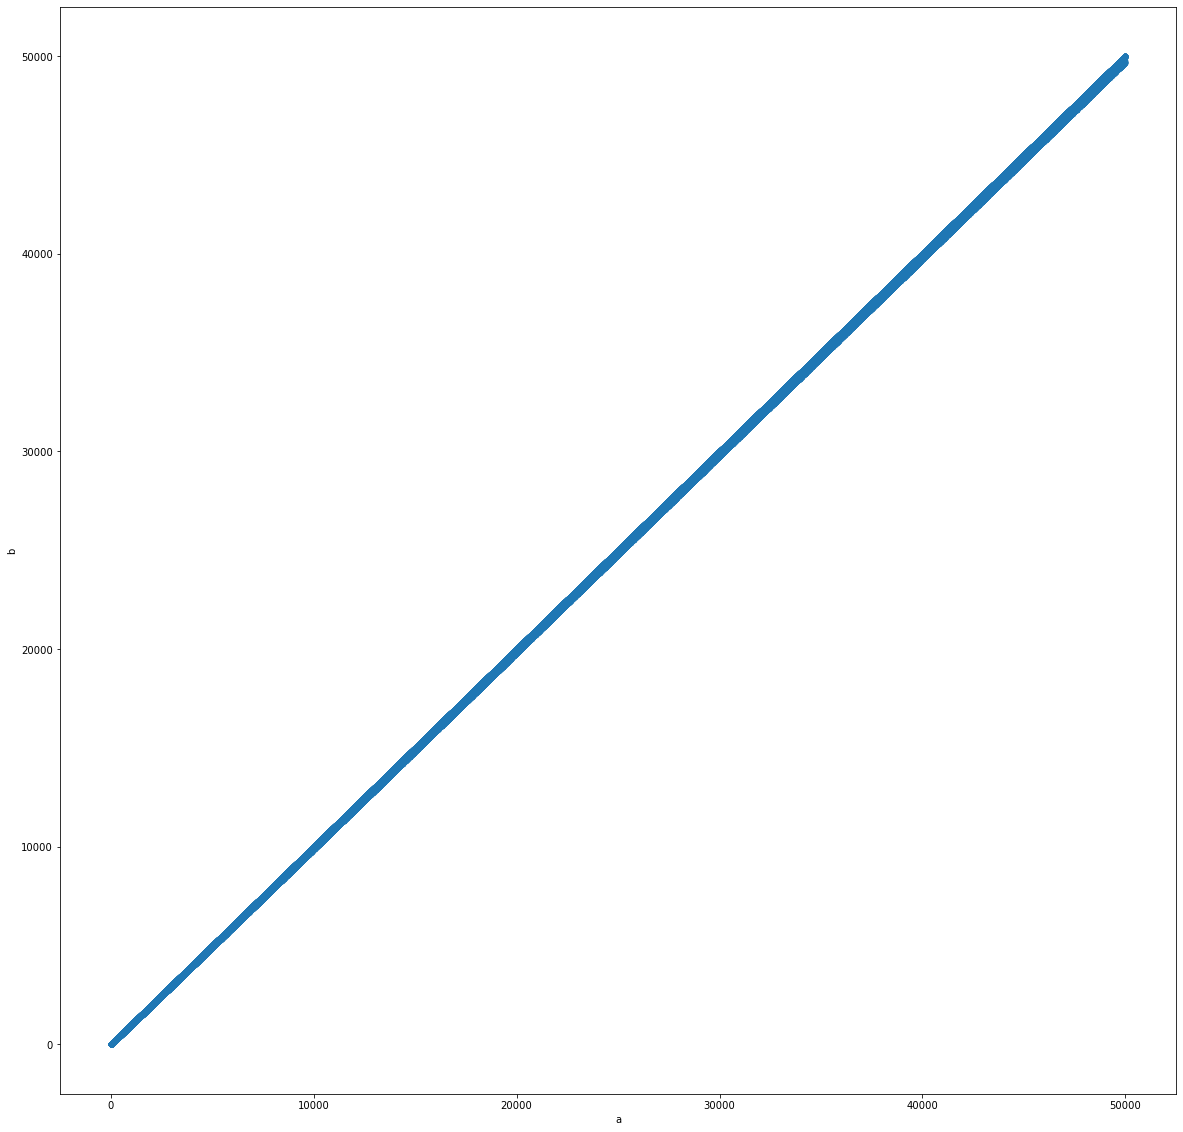

In [290]:
df2.plot(x="a",y="b",figsize=(20,20),kind="scatter")

In [291]:
df2=df2.loc[df2["n"]<=limi]

In [292]:
print(df2.to_string())

           a      b      n
0          2      1      2
1          3      2      3
3          4      3      4
4          5      4      5
6          6      5      6
8          7      6      7
2          4      2      8
10         8      7      8
5          6      4      8
12         9      8      9
13        10      9     10
15        11     10     11
18        12     11     12
20        13     12     13
22        14     13     14
25        15     14     15
28        16     15     16
30        17     16     17
32        18     17     18
17        12      9     18
11         9      6     18
33        19     18     19
36        20     19     20
24        15     12     20
9          8      5     20
38        21     20     21
41        22     21     22
42        23     22     23
45        24     23     24
48        25     24     25
50        26     25     26
51        27     26     27
53        28     27     28
7          7      4     28
44        24     21     28
55        29     28     29
6

In [293]:
altdf=df2.loc[(df2["a"]>=2) & (df2["a"]<=df2["n"]-2) & (df2["b"]>=2) & (df2["b"]<=df2["n"]-2) ]

In [294]:
print(altdf.to_string())

           a      b      n
2          4      2      8
5          6      4      8
17        12      9     18
11         9      6     18
24        15     12     20
9          8      5     20
7          7      4     28
44        24     21     28
35        20     16     32
27        16     12     32
23        15     11     33
40        22     18     33
21        14     10     35
47        25     21     35
59        30     26     39
19        13      9     39
16        12      8     48
81        40     36     48
46        25     20     50
58        30     25     50
80        40     35     56
37        21     16     56
93        45     40     60
34        20     15     60
70        36     30     72
86        42     36     72
153       70     66     77
14        11      7     77
140       65     60     78
31        18     13     78
57        30     24     80
120       56     50     80
143       66     60     88
52        28     22     88
119       56     49     98
103       49     42     98
2

In [295]:
alli=altdf.loc[(altdf["n"]<=limi)]

In [296]:
len(pd.unique(alli["n"]))/limi

3553/50000

<AxesSubplot:xlabel='a', ylabel='b'>

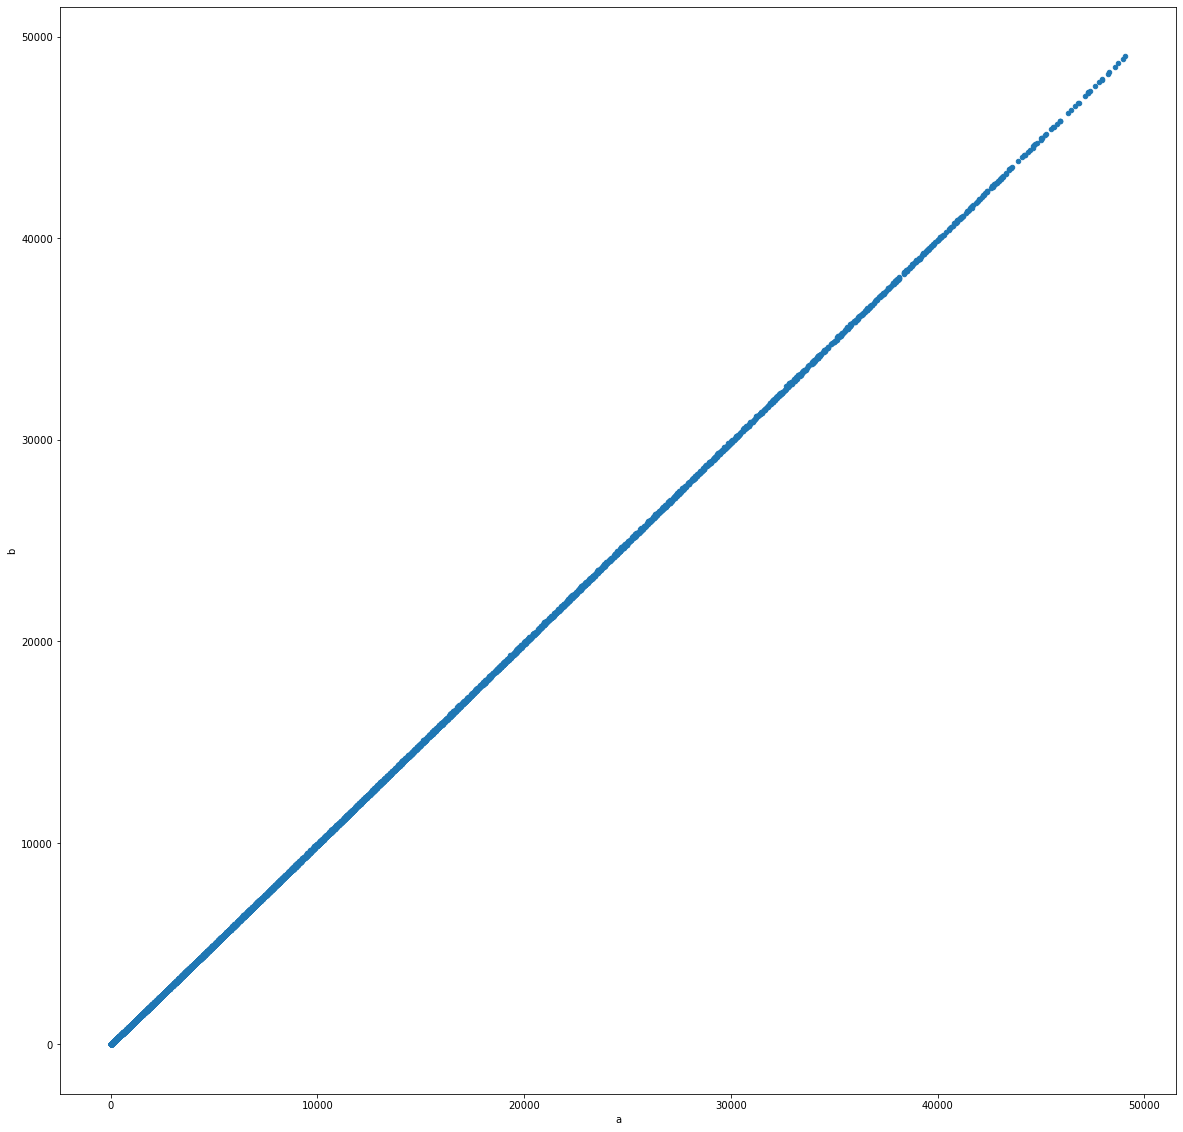

In [297]:
altdf.plot(x="a",y="b",figsize=(20,20),kind="scatter")